# Project for UDA Assessment
## Author: 02179784 (Mark Roberts)

<B>Project Description:</B><BR>
The intention of this project is to create a "generic" model for categorization.  A set of graphic images are "converted" to a standard format:
 - Converted from colour to black & white.
 - Transformed to a standard size (350,350).
 which can be trained 

The dataset used in this project where obtained from Kaggle: [Monkeys]().<BR>
Due to the size of this dataset I have cut down the original 10 categories of monkeys to 4 categories.  The dataset contains training and testing (validation) images.  The details of the 3 monkey categories are shown below:

Here we train a model to recognise the monkey categories.  Note that the category of monkey is given by the directory in which the picture is located (e.g. n0).  The mapping from directories is given here:

| Label | Latin Name | Common Name | Train Images | Validation Images |
| --- | --- | --- | --- | --- |
| n0 | alouatta_palliata | mantled_howler | 105 | 26 |
| n1 | erythrocebus_patas | patas_monkey | 111 | 28 |
| n2 | cacajao_calvus | bald_uakari | 110 | 27 |
| n3 | macaca_fuscata | japanese_macaque | 122 | 30 |
    
<B>General Information:</B><BR>
 - This script was run on a Macbook Pro. with 32 GB of RAM.
 - The total run time of the Jupyter notebook was (approx) 120 seconds.
 - The Github repository for all code and datasets can be obtained by cloning the repository:
[GitHub-Repo](git@github.com:Mark12481632/UDA_Assessment_4_02179784_Roberts.git)
 - <B>The environment running the note book must allow for the creation of directories!!</B>
    


In [23]:
# Import the libraries we will use:

import imageio
import numpy as np
import pandas as pd
from PIL import Image
from skimage import data, io
import os
from IPython.display import display # to display images

## Step 1
In this step we will convert all coloured monkey photos into black & white ones of a fixed size.
This step can be omitted if the photos are already there.

In [13]:
# Create the Black-White monkey photos from the coloured ones and standardize the shape.
# (Run time about 20 seconds)
# ======================================================================================

def create_bw_photo(infile, outfile):
    """
    """
    img = Image.open(infile)

    img = img.convert("L").resize((350,350))
    bw_image = np.array(img.getdata(), dtype = np.uint8).reshape(350,350)

    # Sanity check
    if img.size != bw_image.shape:
        print(f"ISSUE when sizing {in_dir + file}")

    io.imsave(outfile, bw_image)
    

# Directories for datasets:
photo_root = "./monkeys"

source_training_photos = photo_root + "/source_dataset/training"
dest_training_photos = photo_root + "/derived_dataset/training"

source_validation_photos = photo_root + "/source_dataset/validation"
dest_validation_photos = photo_root + "/derived_dataset/validation"

# Restrict our analysis to following monkey categories:
monkey_groups = ["/n0", "/n1", "/n2", "/n3"]

for group in monkey_groups:
    # Process "training" dataset:
    # Create B&W output directory
    os.makedirs(dest_training_photos + group, exist_ok=True)
        
    # What are the colour photo files
    group_files = os.listdir(source_training_photos + group)
    print(f"DEBUG: Processing Group (Training): {group}, with {len(group_files)} files")

    in_dir = source_training_photos + group + "/"
    out_dir = dest_training_photos + group + "/"

    for file in group_files:
        create_bw_photo(in_dir + file, out_dir + file)


    # Process "validation" dataset:
    # Create B&W output directory
    os.makedirs(dest_validation_photos + group, exist_ok=True)

    # What are the colour photo files        
    group_files = os.listdir(source_validation_photos + group)
    print(f"DEBUG: Processing Group (Validation): {group}, with {len(group_files)} files")

    in_dir = source_validation_photos + group + "/"
    out_dir = dest_validation_photos + group + "/"

    for file in group_files:
        create_bw_photo(in_dir + file, out_dir + file)

DEBUG: Processing Group (Training): /n0, with 105 files
DEBUG: Processing Group (Validation): /n0, with 26 files
DEBUG: Processing Group (Training): /n1, with 111 files
DEBUG: Processing Group (Validation): /n1, with 28 files
DEBUG: Processing Group (Training): /n2, with 110 files
DEBUG: Processing Group (Validation): /n2, with 27 files
DEBUG: Processing Group (Training): /n3, with 122 files
DEBUG: Processing Group (Validation): /n3, with 30 files


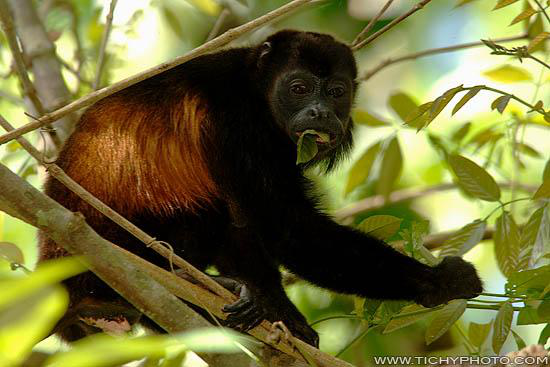

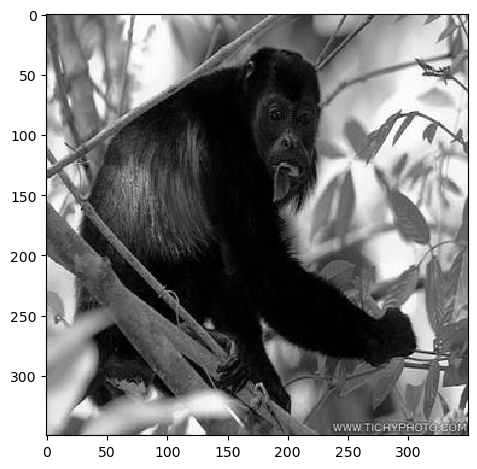

In [24]:
# Show an original colour image and the "standardized" black-white image:
orig_img = Image.open(source_training_photos + "/n0/n0018.jpg")
display(orig_img)

# Show "standardized" version of same image.
new_img = io.imread(dest_training_photos + "/n0/n0018.jpg")
io.imshow(new_img)

## Step 2
